In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# read file
crashes = pd.read_csv('cleaned_data/all_crashes.csv')

In [4]:
# remove object ID and Unnamed 0. column
crashes = crashes.drop(['OBJECTID'],axis =1)

In [5]:
crashes.head()

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,STAT_DIV_NAME
0,T20140013514,Driving accident,Unfinished,2014/07/01,13:09:00,No,Collision with vehicle,Monday,RIGHT THROUGH,No,...,0.0,2.0,0.0,0.0,TOWNS,TOWNS,MITCHELL,NORTHERN REGION,Arterial Highway,Country
1,T20140013549,Driving accident,Finished,2014/07/02,00:01:00,Yes,Collision with vehicle,Wednesday,U TURN,No,...,0.0,2.0,0.0,0.0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro
2,T20140013563,Driving accident,Finished,2014/07/02,10:08:00,No,Collision with vehicle,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),Yes,...,0.0,2.0,0.0,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro
3,T20140013567,Driving accident,Finished,2014/07/02,09:12:00,No,Collision with vehicle,Wednesday,RIGHT THROUGH,No,...,1.0,1.0,0.0,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro
4,T20140013582,Driving accident,Finished,2014/07/02,12:20:00,No,Collision with a fixed object,Wednesday,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE,No,...,0.0,0.0,1.0,0.0,MELB_URBAN,MELB_URBAN,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,Local Road,Metro


In [6]:
# group by daya_of_week
dow = crashes.groupby("DAY_OF_WEEK")
accident_frequency = dow.count()
accident_frequency = accident_frequency["ACCIDENT_NO"]
# list to reorder accident_frequency 
reorder = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# reorder accident_frequency 
accident_frequency = accident_frequency.reindex(reorder)
accident_frequency

DAY_OF_WEEK
Monday        9822
Tuesday      10294
Wednesday    10589
Thursday     10875
Friday       10746
Saturday      7681
Sunday       10996
Name: ACCIDENT_NO, dtype: int64

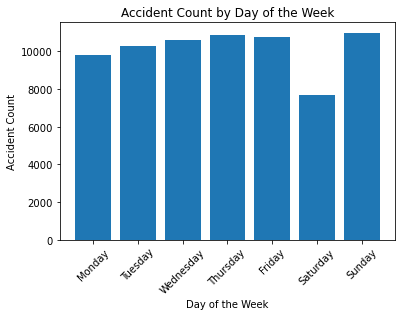

In [7]:
plt.bar(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],accident_frequency)
plt.xticks(rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Accident Count")
plt.title("Accident Count by Day of the Week")
plt.show()

We can see that the amount of accidents increases throughout the week, but there is a sudden drop in accidents on Saturday. Why? Are less people driving? Are road saftey ads working? Is saturday so low because people are recovering from the night before? Or are people out past 12am on a saturday that if they do have an accident it is counted as a sunday

### Create function that filters out for  a particular day

In [8]:
# create function that filters for a particular day of week
# returns dataframe, takes a dataframe and the a string as arguments
def day_wanted(dataframe,day_of_week):
    day = dataframe[dataframe["DAY_OF_WEEK"] == day_of_week]
    return day

### Create function that finds the counts of each hour for a particular day

In [9]:
# function that finds hour counts for a particular day of the week
# function takes a dataframe as an argument
# the function returns a dataframe
# 1st column is the labels for the hours (12am,1am) ect
# 2nd column is the conts for each hourn itself

def hour_count(dataframe):
    # create a list for counts
    hour_counts = []

    # create labels for each hour
    hour_labels = []
    
    for i in range(24):
        if i == 0:
            hour_labels.append(f'12am')
        elif i < 12:
            hour_labels.append(f"{i}am")
        elif i == 12:
            hour_labels.append('12pm')
        else:
            hour_labels.append(f'{i-12}pm')


    # add labels as the first element
    hour_counts.append(hour_labels)

    # calculate the count for the particular day
    amounts = []
    for i in range(24):
        if i < 10:
            count = dataframe[(dataframe["ACCIDENT_TIME"] > "0"+str(i)+ ":00:00") 
                       & (dataframe["ACCIDENT_TIME"] <= "0"+str(i)+":59:00")]["ACCIDENT_TIME"].count()
    #         print(f'This is hour {i}: there are this many accidents: {count}')
            amounts.append(count)

        else:
            count = dataframe[(dataframe["ACCIDENT_TIME"] > str(i)+ ":00:00") 
                       & (dataframe["ACCIDENT_TIME"] <= str(i)+":59:00")]["ACCIDENT_TIME"].count()
    #         print(f'This is hour {i}: there are this many accidents: {count}')
            amounts.append(count)

    hour_counts.append(amounts)
    week_day_counts = pd.DataFrame({"Hours":hour_counts[0],"Counts":hour_counts[1]})
    
    return week_day_counts

### Create display function

In [10]:
# create functions that display accident count against hour of the day
# takes a dataframe and s string
# displays a graph

def display_day(dataframe, day):
    plt.bar(dataframe["Hours"],dataframe["Counts"])
    plt.xticks(rotation=90)
    plt.xlabel("Hour")
    plt.ylabel("Accident Count")
    plt.title(f"Accident Count Per Hour on a {day}")

    plt.show()

### Create a function that uses all previous functions and does everything at once

If you want to use this function, call the function name and then the first argument will be the dataframe you are using and then as a string the second argument is the day of the week you want to show.

In [11]:
# takes dataframe, and string as arguments
def accident_count_per_hour(dataframe,day):
    filtered_day = day_wanted(dataframe,day)
    hours_counted = hour_count(filtered_day)
    display_day(hours_counted,day)

## Saturday

### Plot count of accidents for each hour against the corresponding frequencies

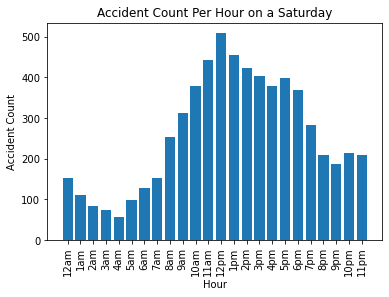

In [12]:
accident_count_per_hour(crashes,"Saturday")

## Sunday

### Plot count of accidents for each hour against the corresponding frequencies

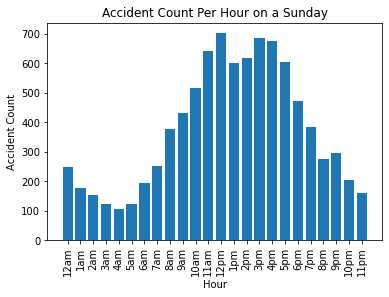

In [13]:
accident_count_per_hour(crashes,"Sunday")

Increase of accidents at 12am on sunday, comfirms theory that people are out past midnight. Maybe do a two sample t-stes? (Ask Nick/Akshay if this is the right thing to do). Might not be, but good thing to ask.

Maybe even look at 12am values for all days of the week, and compare to sunday 12am value. Maybe some kind of test?

### Melbourne accident rate by day of the week

In [14]:
# read file
melb = pd.read_csv('cleaned_data/melbourne_data.csv')

### Saturday

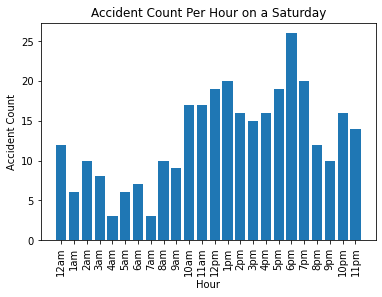

In [15]:
accident_count_per_hour(melb,"Saturday")

### Sunday

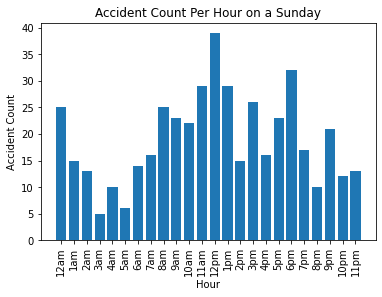

In [16]:
accident_count_per_hour(melb,"Sunday")

### Hume

In [17]:
# read file
hume = pd.read_csv('cleaned_data/hume_data.csv')

### Saturday

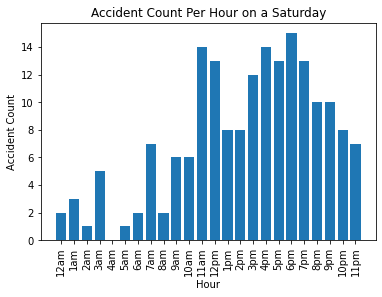

In [18]:
accident_count_per_hour(hume,"Saturday")

### Sunday

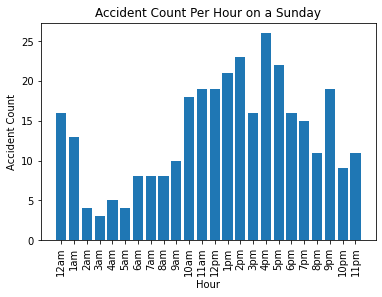

In [19]:
accident_count_per_hour(hume,"Sunday")

Two sample t-test for melb and hume data, to see if there is a differnce in the counts (maybe for fatality rates? As we can look at means there). Or ask if there is a test we can do. If not, then no need for it.

## Extra Analysis

### Fatality count

### Average fatality Count (I think this may be the correct way)

In [20]:
# looking at mean fatality rate

fatality_rate = dow["FATALITY"].mean()
reorder = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

fatality_rate = fatality_rate.reindex(reorder)
fatality_rate

DAY_OF_WEEK
Monday       0.022704
Tuesday      0.017194
Wednesday    0.020493
Thursday     0.018943
Friday       0.022241
Saturday     0.029944
Sunday       0.019916
Name: FATALITY, dtype: float64

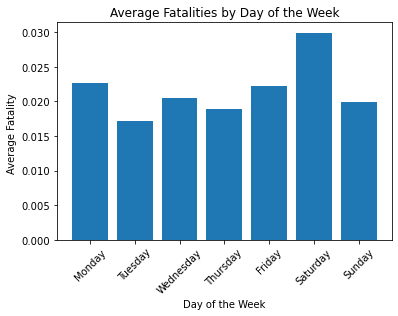

In [21]:
plt.bar(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],fatality_rate)
plt.xticks(rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Average Fatality ")
plt.title("Average Fatalities by Day of the Week")
plt.show()

Saturday had the highest average fatality rate.

### Look at accident count (or mean)  grouped by year

In [22]:
# split date into three columns (year,month,day)
crashes[['YEAR',"MONTH"]] = crashes['ACCIDENT_DATE'].str.split('/',1,expand =True)
crashes[['MONTH',"DAY"]] = crashes['MONTH'].str.split('/',1,expand =True)
crashes

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,STAT_DIV_NAME,YEAR,MONTH,DAY
0,T20140013514,Driving accident,Unfinished,2014/07/01,13:09:00,No,Collision with vehicle,Monday,RIGHT THROUGH,No,...,0.0,TOWNS,TOWNS,MITCHELL,NORTHERN REGION,Arterial Highway,Country,2014,07,01
1,T20140013549,Driving accident,Finished,2014/07/02,00:01:00,Yes,Collision with vehicle,Wednesday,U TURN,No,...,0.0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,2014,07,02
2,T20140013563,Driving accident,Finished,2014/07/02,10:08:00,No,Collision with vehicle,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),Yes,...,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,2014,07,02
3,T20140013567,Driving accident,Finished,2014/07/02,09:12:00,No,Collision with vehicle,Wednesday,RIGHT THROUGH,No,...,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,2014,07,02
4,T20140013582,Driving accident,Finished,2014/07/02,12:20:00,No,Collision with a fixed object,Wednesday,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE,No,...,0.0,MELB_URBAN,MELB_URBAN,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,Local Road,Metro,2014,07,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70998,T20200005929,Driving accident,Finished,2018/11/02,14:30:00,No,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,Local Road,Metro,2018,11,02
70999,T20200010870,Driving accident,Unfinished,2018/01/15,15:00:00,No,Collision with vehicle,Sunday,CROSS TRAFFIC(INTERSECTIONS ONLY),No,...,0.0,RURAL_VICTORIA,RURAL_VICTORIA,WYNDHAM,METROPOLITAN NORTH WEST REGION,Local Road,Metro,2018,01,15
71000,T20200012822,Driving accident,Unfinished,2019/01/17,12:30:00,No,Struck Pedestrian,Wednesday,PARKED CAR RUN AWAY,No,...,0.0,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,GEELONG,SOUTH WESTERN REGION,Local Road,Country,2019,01,17
71001,T20200013045,Driving accident,Unfinished,2019/03/27,17:59:00,No,No collision and no object struck,Tuesday,UNKNOWN-NO DETAILS ON MANOEUVRES OF ROAD-USERS...,No,...,1.0,MELB_URBAN,MELB_URBAN,STONNINGTON,METROPOLITAN SOUTH EAST REGION,Arterial Other,Metro,2019,03,27


In [24]:
# group by year
accidents_per_year = crashes.groupby("YEAR").count()["ACCIDENT_NO"]
accidents_per_year

YEAR
2014     6700
2015    15790
2016    15933
2017    13417
2018    12758
2019     6405
Name: ACCIDENT_NO, dtype: int64

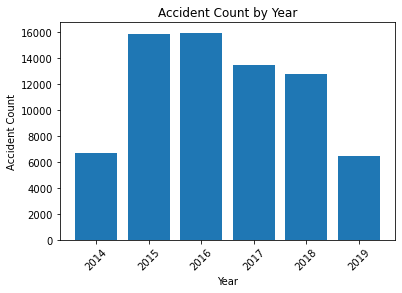

In [25]:
plt.bar(["2014","2015","2016","2017","2018","2019"],accidents_per_year)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.title("Accident Count by Year")
plt.show()

We can see that 2015 and 2016 had the highest accident count. Why? 2019 has the lowest. Did 2019 have less data? Only has until june 30th. This is probably why.

Edit: 2014 and 2019 are only half years (see below)

In [26]:
crashes[crashes["YEAR"] == "2019"]["ACCIDENT_DATE"].sort_values()
crashes[crashes["YEAR"] == "2014"]["ACCIDENT_DATE"].sort_values()

0       2014/07/01
27      2014/07/01
26      2014/07/01
44      2014/07/01
20      2014/07/01
           ...    
5710    2014/12/31
5709    2014/12/31
6070    2014/12/31
5722    2014/12/31
5572    2014/12/31
Name: ACCIDENT_DATE, Length: 6700, dtype: object

In [27]:
# mulitindex_crashes = crashes.groupby(["YEAR", "DAY_OF_WEEK"])
# counts = mulitindex_crashes.count()["ACCIDENT_NO"]
# # column_names = ["YEAR","DAY_OF_WEKK","COUNT"]

# mi = crashes.set_index(["YEAR"])
# mi.groupby("DAY_OF_WEEK").count()

### Multindex (year, do of week) Issue: How to plot

In [28]:
crashes.set_index(['YEAR',"DAY_OF_WEEK"])

ACCIDENT_NO          ABS_CODE ACCIDENT_STATUS  \
YEAR DAY_OF_WEEK                                                   
2014 Monday       T20140013514  Driving accident      Unfinished   
     Wednesday    T20140013549  Driving accident        Finished   
     Wednesday    T20140013563  Driving accident        Finished   
     Wednesday    T20140013567  Driving accident        Finished   
     Wednesday    T20140013582  Driving accident        Finished   
...                        ...               ...             ...   
2018 Thursday     T20200005929  Driving accident        Finished   
     Sunday       T20200010870  Driving accident      Unfinished   
2019 Wednesday    T20200012822  Driving accident      Unfinished   
     Tuesday      T20200013045  Driving accident      Unfinished   
2018 Friday       T20200017444  Driving accident      Unfinished   

                 ACCIDENT_DATE ACCIDENT_TIME ALCOHOLTIME  \
YEAR DAY_OF_WEEK                                           
2014 Monday         2014/07/01      13:09:00          No   
     Wednesday      2014/07/02      00:01:00         Yes   
     Wednesday      2014/07/02      10:08:00          No   
     Wednesday      2014/07/02      09:12:00          No   
     Wednesday      2014/07/02      12:20:00          No   
...                        ...           ...         ...   
2018 Thursday       2018/11/02      14:30:00          No   
     Sunday         2018/01/15      15:00:00          No   
2019 Wednesday      2019/01/17      12:30:00          No   
     Tuesday        2019/03/27      17:59:00          No   
2018 Friday         2018/05/12      12:00:00          No   

                                      ACCIDENT_TYPE  \
YEAR DAY_OF_WEEK                                      
2014 Monday                  Collision with vehicle   
     Wednesday               Collision with vehicle   
     Wednesday               Collision with vehicle   
     Wednesday               Collision with vehicle   
     Wednesday        Collision with a fixed object   
...                                             ...   
2018 Thursday                Collision with vehicle   
     Sunday                  Collision with vehicle   
2019 Wednesday                    Struck Pedestrian   
     Tuesday      No collision and no object struck   
2018 Friday                  Collision with vehicle   

                                                           DCA_CODE  \
YEAR DAY_OF_WEEK                                                      
2014 Monday                                           RIGHT THROUGH   
     Wednesday                                               U TURN   
     Wednesday                    CROSS TRAFFIC(INTERSECTIONS ONLY)   
     Wednesday                                        RIGHT THROUGH   
     Wednesday            OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE   
...                                                             ...   
2018 Thursday                       REAR END(VEHICLES IN SAME LANE)   
     Sunday                       CROSS TRAFFIC(INTERSECTIONS ONLY)   
2019 Wednesday                                  PARKED CAR RUN AWAY   
     Tuesday      UNKNOWN-NO DETAILS ON MANOEUVRES OF ROAD-USERS...   
2018 Friday                       CROSS TRAFFIC(INTERSECTIONS ONLY)   

                 HIT_RUN_FLAG        LIGHT_CONDITION  ... MOTORCYCLE  \
YEAR DAY_OF_WEEK                                      ...              
2014 Monday                No                    Day  ...        0.0   
     Wednesday             No  Dark Street lights on  ...        0.0   
     Wednesday            Yes                   Unk.  ...        0.0   
     Wednesday             No                    Day  ...        0.0   
     Wednesday             No                    Day  ...        1.0   
...                       ...                    ...  ...        ...   
2018 Thursday              No                    Day  ...        0.0   
     Sunday                No                   Unk.  ...        